In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('HR Employee Attrition.csv').drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)

범주형, binary 전처리

In [4]:
binary_column = ["Attrition", "Gender", "OverTime", "PerformanceRating"]
df[binary_column] = df[binary_column].replace({"Yes":1, "No":0, "Male":1, "Female":0, 3:0, 4:1})

category_column = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]
df[category_column] = df[category_column].replace({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2,
                                                   "Research & Development":0, "Sales":1, "Human Resources":2,
                                                   "Life Sciences":0, "Medical":1, "Marketing":2, "Technical Degree":3, "Other":4,
                                                   "Sales Executive":0, "Research Scientist":1, "Laboratory Technician":2, "Manufacturing Director":3, "Healthcare Representative":4,
                                                   "Single":0, "Married":1, "Divorced":2})

ordinary_column = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                   "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

Pearson 상관관계 계수 Heatmap

C:\Users\LG\AppData\Local\Temp\ipykernel_9068\771280700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr("pearson")


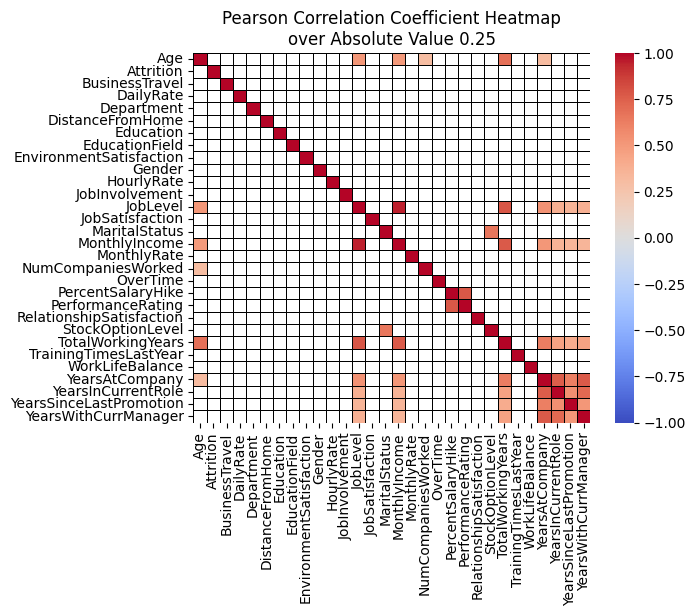

In [7]:
corr_matrix = df.corr("pearson")
sns.heatmap(corr_matrix[np.abs(corr_matrix) >= 0.25],
            cmap="coolwarm", 
            linewidths=0.5, linecolor="black",
            vmin=-1.0, vmax=1.0)
plt.xticks(ticks=np.array(range(len(corr_matrix)))+0.5,labels=corr_matrix.columns)
plt.yticks(ticks=np.array(range(len(corr_matrix)))+0.5,labels=corr_matrix.index)
plt.title("Pearson Correlation Coefficient Heatmap\nover Absolute Value 0.25")
plt.show()